# $$Pathrise Project$$

## Step-1 : A little business understanding!

Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow. The first 2 weeks in the program are called a free trial period and a fellow can withdraw within this free trial period without any penalty. After 2 weeks, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. The entire program lasts up to a year, including 8 weeks of the core curriculum. If a fellow is unable to find a job within a year after joining Pathrise, his/her contract is terminated. However, there might be some exceptions. For instance, if someone was on a break, we may extend their contract for the period of the break. 

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business. In this exercise we provide you with a sample of information we collected from our fellows from the moment they joined our program. Please don’t expect this data set to be perfect, it never happens in the real world. 
 
The main goal of your analysis is to derive insights around 
* 1-if a fellow will ultimately be placed at a company ------> target is <code>placed</code>
* 2-how long until a placement can be expected ------> target is <code>program_duration_days</code>


* id 
* pathrise_status
* primary_track
* cohort_tag
* program_duration_days
* placed
* employment_status
* highest_level_of_education
* length_of_job_search
* biggest_challenge_in_search
* professional_experience
* work_authorization_status
* number_of_interviews
* number_of_applications
* gender
* race

### Importing Libraries

In [406]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

!pip install missingno
import missingno as msno

In [407]:
#This code sets the maximum number of columns that Pandas will display when printing a DataFrame to be unlimited.
pd.set_option('display.max_columns', None)

#This code sets the maximum width of the columns in a Pandas DataFrame to be unlimited
pd.set_option('display.max_colwidth', None)

## Step-2 : Exploring raw data

In [415]:
df = pd.read_excel("Data_Pathrise.xlsx")

In [416]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [418]:
df.shape

(2544, 16)

In [419]:
df.head(5)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [420]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [421]:
print(df.columns)

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')


In [422]:
#number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

program_duration_days          616
gender                         492
work_authorization_status      284
employment_status              229
professional_experience        222
number_of_interviews           218
length_of_job_search            74
highest_level_of_education      58
biggest_challenge_in_search     24
race                            18
cohort_tag                       8
id                               0
pathrise_status                  0
primary_track                    0
placed                           0
number_of_applications           0
dtype: int64

## Step-3 : Remove unnecessary features

In [423]:
df = df.drop(columns=['id', 'program_duration_days', 'work_authorization_status', 'pathrise_status', 'cohort_tag'] , axis=1)
df

,primary_track,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,number_of_interviews,number_of_applications,gender,race
0,SWE,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,2.0,900,Male,Non-Hispanic White or Euro-American
1,PSO,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,6.0,0,Male,Non-Hispanic White or Euro-American
2,Design,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,0.0,0,Male,East Asian or Asian American
3,PSO,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,5.0,25,Male,Decline to Self Identify
4,SWE,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...
2539,Design,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,4.0,15,Male,Non-Hispanic White or Euro-American
2540,Data,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,1.0,7,Male,Non-Hispanic White or Euro-American
2541,SWE,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,1.0,30,Female,Non-Hispanic White or Euro-American
2542,SWE,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,2.0,10,Male,Decline to Self Identify


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   placed                       2544 non-null   int64  
 2   employment_status            2315 non-null   object 
 3   highest_level_of_education   2486 non-null   object 
 4   length_of_job_search         2470 non-null   object 
 5   biggest_challenge_in_search  2520 non-null   object 
 6   professional_experience      2322 non-null   object 
 7   number_of_interviews         2326 non-null   float64
 8   number_of_applications       2544 non-null   int64  
 9   gender                       2052 non-null   object 
 10  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 218.8+ KB


## Step-4 :challenge with missing values

In [425]:
#number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

gender                         492
employment_status              229
professional_experience        222
number_of_interviews           218
length_of_job_search            74
highest_level_of_education      58
biggest_challenge_in_search     24
race                            18
primary_track                    0
placed                           0
number_of_applications           0
dtype: int64

In [426]:
# the number of rows that have missing values
df[df.isnull().any(axis=1)]

,primary_track,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,number_of_interviews,number_of_applications,gender,race
18,SWE,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,Less than one year,NaN,15,Male,East Asian or Asian American
24,Design,0,Contractor,NaN,1-2 months,Hearing back on my applications,3-4 years,0.0,20,NaN,East Asian or Asian American
28,PSO,0,Employed Full-Time,Bachelor's Degree,6 months to a year,Hearing back on my applications,Less than one year,NaN,45,Male,Non-Hispanic White or Euro-American
39,SWE,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,NaN,15,Male,Native American or Alaskan Native
43,PSO,0,Unemployed,Bachelor's Degree,6 months to a year,Getting past mid-stage interviews,3-4 years,NaN,60,Female,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...
2533,Design,1,NaN,Bachelor's Degree,1-2 months,Hearing back on my applications,3-4 years,0.0,9,Male,Non-Hispanic White or Euro-American
2535,PSO,0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,0.0,20,NaN,South Asian or Indian American
2536,Design,0,Employed Full-Time,Bachelor's Degree,Over a year,Hearing back on my applications,5+ years,0.0,10,NaN,South Asian or Indian American
2540,Data,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,1.0,7,Male,Non-Hispanic White or Euro-American


<AxesSubplot:>

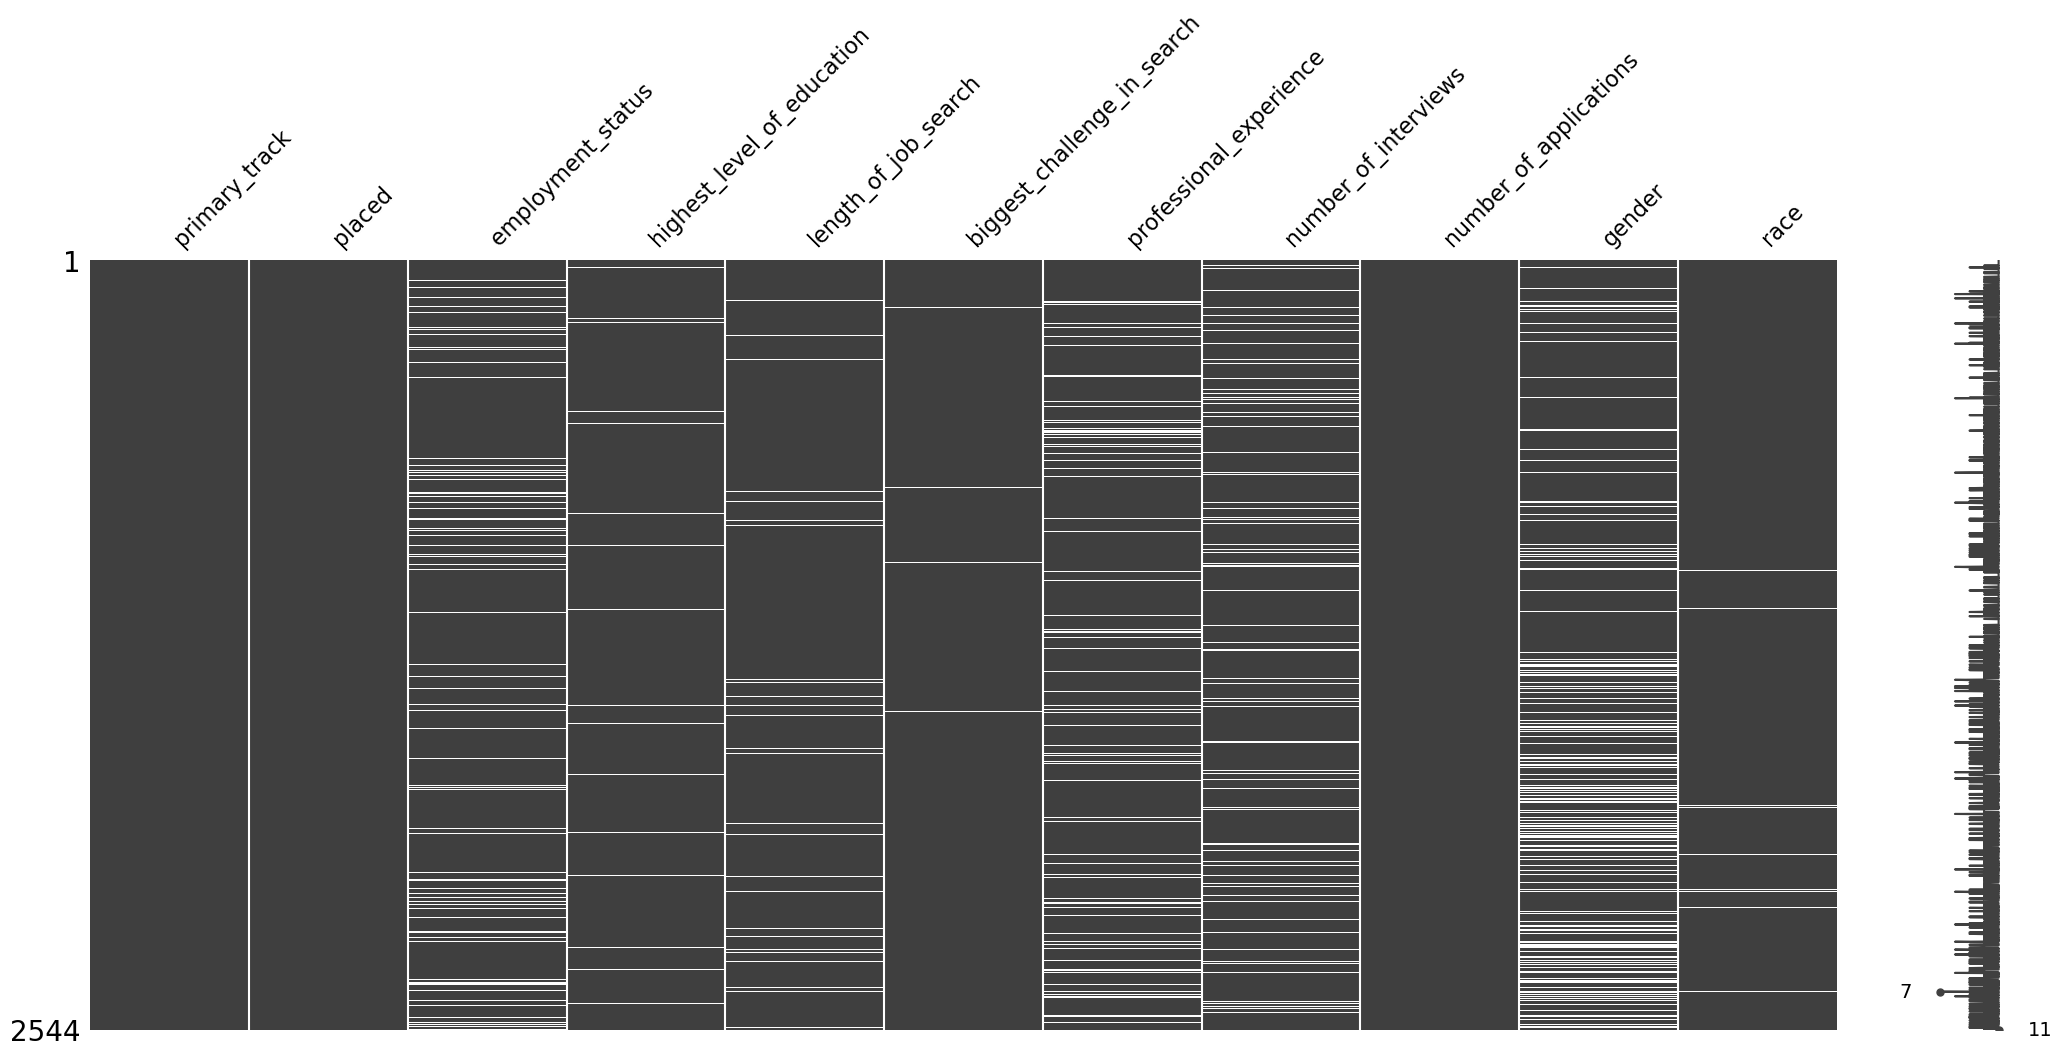

In [427]:
# showing missing values in columns
msno.matrix(df)

### gender

In [428]:
df['gender'].value_counts()

Male                        1492
Female                       538
Decline to Self Identify      16
Non-Binary                     6
Name: gender, dtype: int64

In [429]:
df['gender']=df['gender'].replace(np.nan,'Decline to Self Identify')

In [430]:
df['gender'].value_counts()

Male                        1492
Female                       538
Decline to Self Identify     508
Non-Binary                     6
Name: gender, dtype: int64

### employment_status  

In [431]:
df['employment_status '].value_counts()

Student               775
Unemployed            665
Employed Full-Time    435
Employed Part-Time    270
Contractor            170
Name: employment_status , dtype: int64

In [432]:
# we consider a category "missed" for missing values
# "inplace=True" is a parameter used in Python functions to modify an object in place, without creating a new object. It means that the function will modify the original object and return nothing (or return None).

df['employment_status '].fillna('Missed', inplace=True)

In [433]:
df['employment_status '].value_counts()

Student               775
Unemployed            665
Employed Full-Time    435
Employed Part-Time    270
Missed                229
Contractor            170
Name: employment_status , dtype: int64

### professional_experience

In [434]:
df['professional_experience'].value_counts()

1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: professional_experience, dtype: int64

In [435]:
df['professional_experience'].fillna('Missed', inplace=True)

In [436]:
df['professional_experience'].value_counts()

1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Missed                222
Name: professional_experience, dtype: int64

### number_of_interviews

In [437]:
df['number_of_interviews']

0        2.0
1        6.0
2        0.0
3        5.0
4       10.0
        ... 
2539     4.0
2540     1.0
2541     1.0
2542     2.0
2543     3.0
Name: number_of_interviews, Length: 2544, dtype: float64

In [438]:
mean_1 = df['number_of_interviews'].mean()

In [439]:
mean_1

2.182287188306105

In [440]:
df['number_of_interviews'].replace(np.nan , mean_1 ,inplace=True )

In [441]:
df['number_of_interviews']

0        2.0
1        6.0
2        0.0
3        5.0
4       10.0
        ... 
2539     4.0
2540     1.0
2541     1.0
2542     2.0
2543     3.0
Name: number_of_interviews, Length: 2544, dtype: float64

In [442]:
set(df['number_of_interviews'])

{0.0,
 1.0,
 2.0,
 2.182287188306105,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0}

### length_of_job_search

In [443]:
df['length_of_job_search'].value_counts()

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

In [444]:
df['length_of_job_search'].fillna('missed',  inplace=True)

In [445]:
df['length_of_job_search'].value_counts()

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
missed                  74
Name: length_of_job_search, dtype: int64

### highest_level_of_education 

In [446]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

In [447]:
df['highest_level_of_education'].fillna('missed', inplace=True)

In [448]:
df['highest_level_of_education'].value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
missed                                58
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

### biggest_challenge_in_search

In [449]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: biggest_challenge_in_search, dtype: int64

In [450]:
df['biggest_challenge_in_search'].fillna('missed', inplace=True)

In [451]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
missed                                    24
Name: biggest_challenge_in_search, dtype: int64

### race  

In [452]:
df['race'].value_counts()

East Asian or Asian American                  900
Non-Hispanic White or Euro-American           573
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       69
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: race, dtype: int64

In [453]:
df['race']= df['race'].replace(np.nan , "Decline to Self Identify")

In [454]:
df['race'].value_counts()

East Asian or Asian American                  900
Non-Hispanic White or Euro-American           573
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       87
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: race, dtype: int64

<AxesSubplot:>

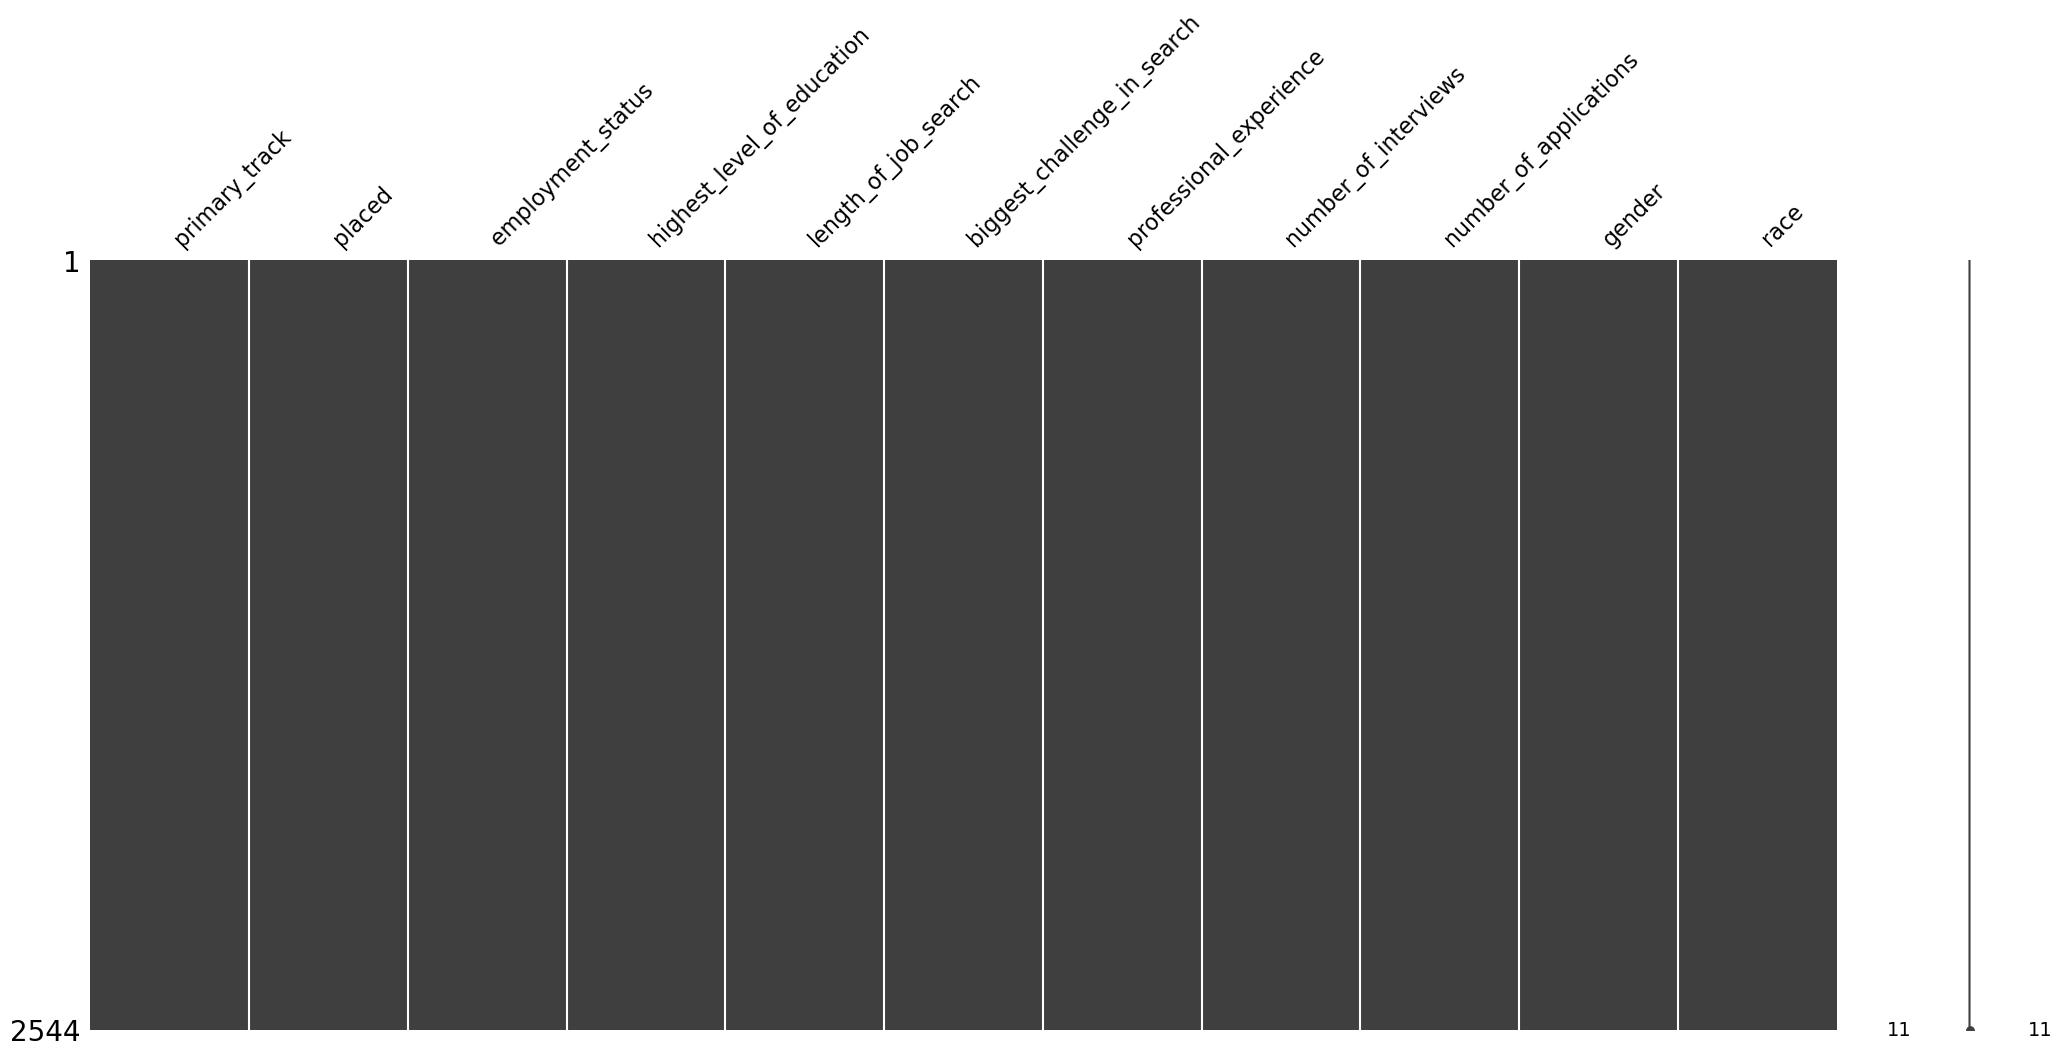

In [455]:
msno.matrix(df)

## Step-5 : get_dummies 

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   placed                       2544 non-null   int64  
 2   employment_status            2544 non-null   object 
 3   highest_level_of_education   2544 non-null   object 
 4   length_of_job_search         2544 non-null   object 
 5   biggest_challenge_in_search  2544 non-null   object 
 6   professional_experience      2544 non-null   object 
 7   number_of_interviews         2544 non-null   float64
 8   number_of_applications       2544 non-null   int64  
 9   gender                       2544 non-null   object 
 10  race                         2544 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 218.8+ KB


In [457]:
df_categorical_to_dummies = pd.get_dummies(df[['primary_track','employment_status ', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race' ]])

In [458]:
df_categorical_to_dummies

,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Missed,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2540,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2541,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2542,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [459]:
df = df.drop(['primary_track','employment_status ', 'highest_level_of_education', 'length_of_job_search','biggest_challenge_in_search','professional_experience','gender','race'] , axis=1)

In [460]:
df = pd.concat([df,df_categorical_to_dummies], axis=1)

In [461]:
df

,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Missed,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,0,2.0,900,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,5.0,25,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1,10.0,100,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0,4.0,15,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2540,0,1.0,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2541,0,1.0,30,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2542,0,2.0,10,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 58 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   placed                                                            2544 non-null   int64  
 1   number_of_interviews                                              2544 non-null   float64
 2   number_of_applications                                            2544 non-null   int64  
 3   primary_track_Data                                                2544 non-null   uint8  
 4   primary_track_Design                                              2544 non-null   uint8  
 5   primary_track_Marketing                                           2544 non-null   uint8  
 6   primary_track_PSO                                                 2544 non-null   uint8  
 7   primary_track_SWE                

## Step-6 : Split the Dataset to Test and Train and Standardize

In [463]:
X=df.drop('placed', axis=1)
Y=df['placed']

In [464]:
X

,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Missed,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,2.0,900,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,6.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,5.0,25,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,10.0,100,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,4.0,15,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2540,1.0,7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2541,1.0,30,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2542,2.0,10,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [465]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-0.06443447, 16.09674137, -0.32865474, ...,  1.85466724,
        -0.51726543, -0.19802951],
       [ 1.34947657, -0.68042183, -0.32865474, ...,  1.85466724,
        -0.51726543, -0.19802951],
       [-0.77138998, -0.68042183, -0.32865474, ..., -0.53918028,
        -0.51726543, -0.19802951],
       ...,
       [-0.41791222, -0.12118306, -0.32865474, ...,  1.85466724,
        -0.51726543, -0.19802951],
       [-0.06443447, -0.4940089 , -0.32865474, ..., -0.53918028,
        -0.51726543, -0.19802951],
       [ 0.28904329,  0.62446864, -0.32865474, ...,  1.85466724,
        -0.51726543, -0.19802951]])

In [466]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Missed,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,highest_level_of_education_Doctorate or Professional Degree,highest_level_of_education_GED or equivalent,highest_level_of_education_High School Graduate,highest_level_of_education_Master's Degree,"highest_level_of_education_Some College, No Degree",highest_level_of_education_Some High School,highest_level_of_education_missed,length_of_job_search_1-2 months,length_of_job_search_3-5 months,length_of_job_search_6 months to a year,length_of_job_search_Less than one month,length_of_job_search_Over a year,length_of_job_search_missed,biggest_challenge_in_search_Behavioral interviewing,biggest_challenge_in_search_Figuring out which jobs to apply for,biggest_challenge_in_search_Getting past final round interviews,biggest_challenge_in_search_Getting past mid-stage interviews,biggest_challenge_in_search_Getting past phone screens,biggest_challenge_in_search_Hearing back on my applications,biggest_challenge_in_search_Lack of relevant experience,biggest_challenge_in_search_Resume gap,biggest_challenge_in_search_Technical interviewing,biggest_challenge_in_search_Technical skills,biggest_challenge_in_search_missed,professional_experience_1-2 years,professional_experience_3-4 years,professional_experience_5+ years,professional_experience_Less than one year,professional_experience_Missed,gender_Decline to Self Identify,gender_Female,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,-0.064434,16.096741,-0.328655,-0.357295,-0.02805,-0.380676,0.718394,-0.048622,-0.267599,-0.454157,-0.344577,-0.314516,-0.661892,1.680941,0.932316,-0.236727,-0.077014,-0.077014,-0.683468,-0.236727,-0.077014,-0.152744,-0.668039,1.984894,-0.319023,-0.686564,-0.222497,-0.173088,-0.155417,-0.280857,-0.361478,-0.299957,-0.275939,1.240533,-0.309204,-0.129563,-0.357295,-0.119808,-0.09759,-0.728482,1.886568,-0.340279,-0.566456,-0.309204,-0.499509,-0.517876,0.839699,-0.048622,-0.228274,-0.188173,-0.739895,-0.255591,-0.1632,-0.03436,1.854667,-0.517265,-0.19803
1,1.349477,-0.680422,-0.328655,-0.357295,-0.02805,2.626903,-1.391993,-0.048622,-0.267599,-0.454157,-0.344577,-0.314516,-0.661892,1.680941,-1.072597,-0.236727,-0.077014,-0.077014,-0.683468,4.224269,-0.077014,-0.152744,-0.668039,1.984894,-0.319023,-0.686564,-0.222497,-0.173088,-0.155417,-0.280857,2.766417,-0.299957,-0.275939,-0.806105,-0.309204,-0.129563,-0.357295,-0.119808,-0.09759,1.372718,-0.530063,-0.340279,-0.566456,-0.309204,-0.499509,-0.517876,0.839699,-0.048622,-0.228274,-0.188173,-0.739895,-0.255591,-0.1632,-0.03436,1.854667,-0.517265,-0.19803
2,-0.771390,-0.680422,-0.328655,2.798809,-0.02805,-0.380676,-1.391993,-0.048622,-0.267599,-0.454157,2.902107,-0.314516,-0.661892,-0.594905,-1.072597,-0.236727,-0.077014,-0.077014,1.463127,-0.236727,-0.077014,-0.152744,-0.668039,-0.503805,-0.319023,1.456528,-0.222497,-0.173088,-0.155417,3.560536,-0.361478,-0.299957,-0.275939,-0.806105,-0.309204,-0.129563,-0.357295,-0.119808,-0.09759,-0.728482,-0.530063,-0.340279,1.765363,-0.309204,-0.499509,-0.517876,0.839699,-0.048622,-0.228274,-0.188173,1.351542,-0.255591,-0.1632,-0.03436,-0.539180,-0.517265,-0.19803
3,0.995999,-0.214390,-0.328655,-0.357295,-0.02805,2.626903,-1.391993,-0.048622,3.736938,-0.454157,-0.344577,-0.314516,-0.661892,-0.594905,0.932316,-0.236727,-0.077014,-0.077014,-0.683468,-0.236727,-0.077014,-0.152744,-0.668039,-0.503805,-0

In [467]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)